### **Data Analytics Final Project Report**




In [3]:
from random import sample
import pandas as pd
import numpy as np

%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import colors

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPRegressor

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import ShuffleSplit

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_error

from sklearn import linear_model
import statsmodels.api as sm

import seaborn as sns
import datetime
from datetime import datetime
from re import S

!pip install pmdarima
from pmdarima import auto_arima


### **Exploratory Data Analysis**

In [ ]:
file_path = 'subway_traffic_volume.csv'


df = pd.read_csv(file_path)
neighborhood_station_counts = df.groupby('Neighborhood')['Stop Name'].nunique()
neighborhood_station_counts = neighborhood_station_counts.sort_values(ascending=False)

print(neighborhood_station_counts)

### **1. Linear Regression**

In [5]:
data = pd.read_csv("subway_neighbor_df.csv")
data['Datetime'] = pd.to_datetime(data['Datetime'], format='%Y-%m-%d %H:%M:%S')
data = data.dropna()
data.head()


y = data.iloc[:,6] #Average_Flow
X = data.iloc[:,8:18] #Housing units - Racial diversity index
#independent_variables = data.iloc[:,8:18]

We have selected Average Flow as our dependent variable (y) and the ten features we decided to keep collectively as our dependent variables (X). After adding a constant to X, we performed multiple linear regression into the data through ordinary least squares.

We were able to find each of the dependent variables' direct effects on average flow by looking at their coefficients, as well as their stastical significance. All of them have P scores of 0 which means they are very statistically significant, and that .   

Moreover, the R-square distribution is only 17.6% which is quite low. This should be unsurprising since the possibility of these features having a linear effect on subway flow is very small. This suggests room for improvement in the model.

In [ ]:
y = data.iloc[:,6] #Average_Flow
X = data.iloc[:,8:18] #Housing units - Racial diversity index

# Add a constant term to the independent variable (X)
X_new = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(y, X_new).fit()
print(model.summary())
#Not good for every station. 17.6% R-squared despite signifcant variables. We are missing something important. We need to consider time as a variable, as average flow changes every four hours but the features do not. Make hour a dummy varaible
#Slice data into 6 pieces. We should create mean value for average flow per station, and ma - that New y becomes mean of average flow.

                            OLS Regression Results                            
Dep. Variable:           Average_Flow   R-squared:                       0.055
Model:                            OLS   Adj. R-squared:                  0.055
Method:                 Least Squares   F-statistic:                     8014.
Date:                Tue, 05 Dec 2023   Prob (F-statistic):               0.00
Time:                        10:19:21   Log-Likelihood:            -2.4167e+06
No. Observations:              277631   AIC:                         4.833e+06
Df Residuals:                  277628   BIC:                         4.833e+06
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                                                              coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------

In [ ]:
residuals = model.resid

model2 = sm.OLS(residuals, X_new).fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                      -0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                -5.837e-09
Date:                Sun, 03 Dec 2023   Prob (F-statistic):               1.00
Time:                        20:54:08   Log-Likelihood:            -3.5711e+07
No. Observations:             4132915   AIC:                         7.142e+07
Df Residuals:                 4132904   BIC:                         7.142e+07
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                                                              coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------

By splitting the data into training and testing data, we fit

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
sm_model = sm.OLS(y_train, X_train).fit()
print(sm_model.summary())

lr = LinearRegression()
lr.fit(X_train, y_train)
print("For a linear model, the R square value based on the training data is", lr.score(X_train, y_train))
print("For a linear model, the R square value based on the training data is", lr.score(X_test, y_test))

                            OLS Regression Results                            
Dep. Variable:           Average_Flow   R-squared:                       0.055
Model:                            OLS   Adj. R-squared:                  0.055
Method:                 Least Squares   F-statistic:                     6416.
Date:                Tue, 05 Dec 2023   Prob (F-statistic):               0.00
Time:                        10:19:29   Log-Likelihood:            -1.9335e+06
No. Observations:              222104   AIC:                         3.867e+06
Df Residuals:                  222101   BIC:                         3.867e+06
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                                                              coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------

In [ ]:
c = lr.intercept_
m = lr.coef_
print(c)
print(m)

896.4949565717343
[ 4.37349473e-02  4.56371617e-05 -1.15529601e-05  8.98736752e-06
 -2.31705259e-03 -1.21164532e-05  1.34127849e-06 -8.20512664e-06
  3.64810847e-05 -4.56962871e-07]


In [ ]:
y_pred_train = lr.predict(X_train)

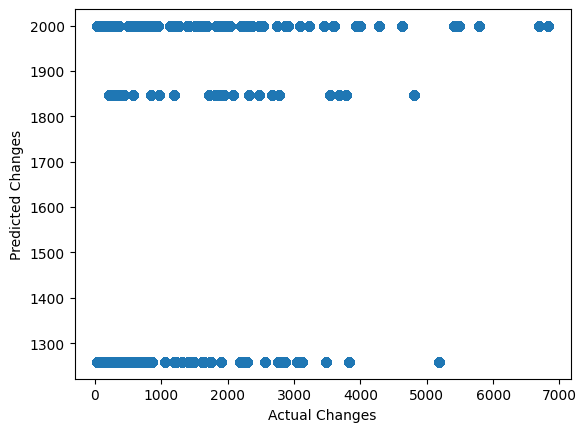

In [ ]:
plt.scatter(y_train, y_pred_train)
plt.xlabel("Actual Changes")
plt.ylabel("Predicted Changes")
plt.show()

In [ ]:
r2_score(y_train, y_pred_train)

0.05462321921904223

In [ ]:
Lines = data['Line'].unique() #Hourly data is periodical and useless; We look into the average flow for each station and each line is
Stops = data['Stop Name'].unique() #For each station across the years
df1 = data[(data['Stop Name'] == '1 Av') & (data['Line'] == 'Canarsie')] #Took the mean of average flow across the whole period, For each station there's only one
print(df1)

                Datetime Stop Name      Line               Neighborhood  \
0    2017-02-04 08:00:00      1 Av  Canarsie  Lower East Side/Chinatown   
1    2017-02-04 12:00:00      1 Av  Canarsie  Lower East Side/Chinatown   
2    2017-02-04 16:00:00      1 Av  Canarsie  Lower East Side/Chinatown   
3    2017-02-04 20:00:00      1 Av  Canarsie  Lower East Side/Chinatown   
4    2017-02-05 00:00:00      1 Av  Canarsie  Lower East Side/Chinatown   
...                  ...       ...       ...                        ...   
9781 2021-08-13 00:00:00      1 Av  Canarsie  Lower East Side/Chinatown   
9782 2021-08-13 04:00:00      1 Av  Canarsie  Lower East Side/Chinatown   
9783 2021-08-13 08:00:00      1 Av  Canarsie  Lower East Side/Chinatown   
9784 2021-08-13 12:00:00      1 Av  Canarsie  Lower East Side/Chinatown   
9785 2021-08-13 16:00:00      1 Av  Canarsie  Lower East Side/Chinatown   

      Entries      Time  Average_Flow  Normalized_Flow  Housing units  \
0      1205.0  08:00:00   

We decided to split the dataset into their individual Lines and Stops.

In [6]:
Lines = data['Line'].unique() #List of unique

training_results = []

Xs = [] #Each X is a row of the matrix, next station next row
Ys = [] #There's only one Y in each station

i = 0
for line in Lines:
    Stops = data[data['Line'] == line]['Stop Name'].unique()  #Stops
    for stop in Stops:
        data_filtered = data[(data['Stop Name'] == stop) & (data['Line'] == line)]
        if not data_filtered.empty:
            X = data_filtered.iloc[:, 8:18].mean().tolist()  # Convert mean values to a list
            Xs.append(X)
            y = data_filtered.iloc[:,6].mean().tolist()
            Ys.append(y)

Xs_matrix = pd.DataFrame(Xs)
Ys_column = pd.DataFrame(Ys)


print(Xs_matrix)
print(Ys_column)

           0     1     2      3          4     5     6     7      8     9
0    78557.0  31.0  38.1   11.4  1326500.0  31.8   7.2  46.4   85.5  0.71
1    78557.0  31.0  38.1   11.4  1326500.0  31.8   7.2  46.4   85.5  0.71
2    87668.0  72.2  42.3    5.8  2413920.0   1.5   9.2  47.5  100.0  0.45
3    87668.0  72.2  42.3    5.8  2413920.0   1.5   9.2  47.5  100.0  0.45
4    65828.0   3.9  10.0  110.3   308780.0  58.5  18.0  32.0   71.2  0.57
..       ...   ...   ...    ...        ...   ...   ...   ...    ...   ...
435  68927.0  50.1   9.9   36.5   463680.0   8.4  14.1  20.1   39.7  0.59
436  68927.0  50.1   9.9   36.5   463680.0   8.4  14.1  20.1   39.7  0.59
437  68927.0  50.1   9.9   36.5   463680.0   8.4  14.1  20.1   39.7  0.59
438  68927.0  50.1   9.9   36.5   463680.0   8.4  14.1  20.1   39.7  0.59
439  51437.0  21.5  26.4   91.2   662740.0  97.4  15.0  26.0   97.9  0.63

[440 rows x 10 columns]
               0
0    2058.808809
1     734.541892
2     339.389812
3    2624.074470
4 

The R2 score is now 34.3% has been improved a lot.

In [7]:
Xs_matrix_new = np.c_[np.ones(Xs_matrix.shape[0]), Xs_matrix]

X = Xs_matrix_new
y = Ys_column

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)
print(y_pred)
r2_score(y_test, y_pred)
print(f"R2 Score: {r2_score(y_test, y_pred)}")

[[ 831.33836887]
 [1268.36586934]
 [ 328.94652693]
 [1127.03801549]
 [1113.17211337]
 [ 569.28450576]
 [1151.69889551]
 [1834.35846937]
 [ 666.46857438]
 [1042.77319339]
 [ 699.32244097]
 [1268.36586934]
 [ 958.57360868]
 [1076.84997851]
 [ 764.95240867]
 [1268.36586934]
 [ 650.32019739]
 [1068.96055972]
 [ 650.32019739]
 [1244.69352682]
 [1315.17737418]
 [1539.9236768 ]
 [2236.68856225]
 [1068.96055972]
 [1127.89376561]
 [2160.87253549]
 [ 650.32019739]
 [ 958.57360868]
 [ 604.53778199]
 [ 399.86127366]
 [ 686.98677708]
 [1834.35846937]
 [ 699.32244097]
 [1042.77319339]
 [ 392.98402203]
 [ 650.32019739]
 [1106.70822363]
 [1127.89376561]
 [ 328.94652693]
 [ 548.94192322]
 [1042.77319339]
 [2160.87253549]
 [1147.29604417]
 [1834.35846937]
 [1244.69352682]
 [ 328.94652693]
 [1151.69889551]
 [ 686.98677708]
 [1268.36586934]
 [ 675.88867054]
 [ 831.33836887]
 [ 650.32019739]
 [1834.35846937]
 [ 986.23814639]
 [1883.7650621 ]
 [1167.47291934]
 [ 864.70841934]
 [ 986.23814639]
 [ 399.8612736

### **2. Decision Tree**

In [ ]:
from sklearn.model_selection import train_test_split
X = Xs_matrix
y = Ys_column

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
from sklearn import tree
model = tree.DecisionTreeRegressor(max_depth=3)

model.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=3)

In [ ]:
#Get the R-Square for the predicted vs actuals on the text sample
print("Training R-Square",model.score(X_train,y_train))
print("Testing R-Square",model.score(X_test,y_test))

Training R-Square 0.3975286020178088
Testing R-Square 0.2287363912719118


In [ ]:
from sklearn.metrics import mean_squared_error

# Use the trained model to make predictions on the test set
y_pred = model.predict(X_test)
y_pred2 = model.predict(X_train)

# Calculate the Mean Squared Error (MSE) between the predicted values (y_pred) and the actual values (y_test)
mse = mean_squared_error(y_test, y_pred)
mse2 = mean_squared_error(y_train, y_pred2)
rmse = np.sqrt(mse)
rmse2 = np.sqrt(mse2)

print("Root Mean Squared Error (RMSE) on testing set:", rmse)
print("Root Mean Squared Error (RMSE) on training set:", rmse2)

Root Mean Squared Error (RMSE) on testing set: 937.4516781889145
Root Mean Squared Error (RMSE) on training set: 771.1788132990058


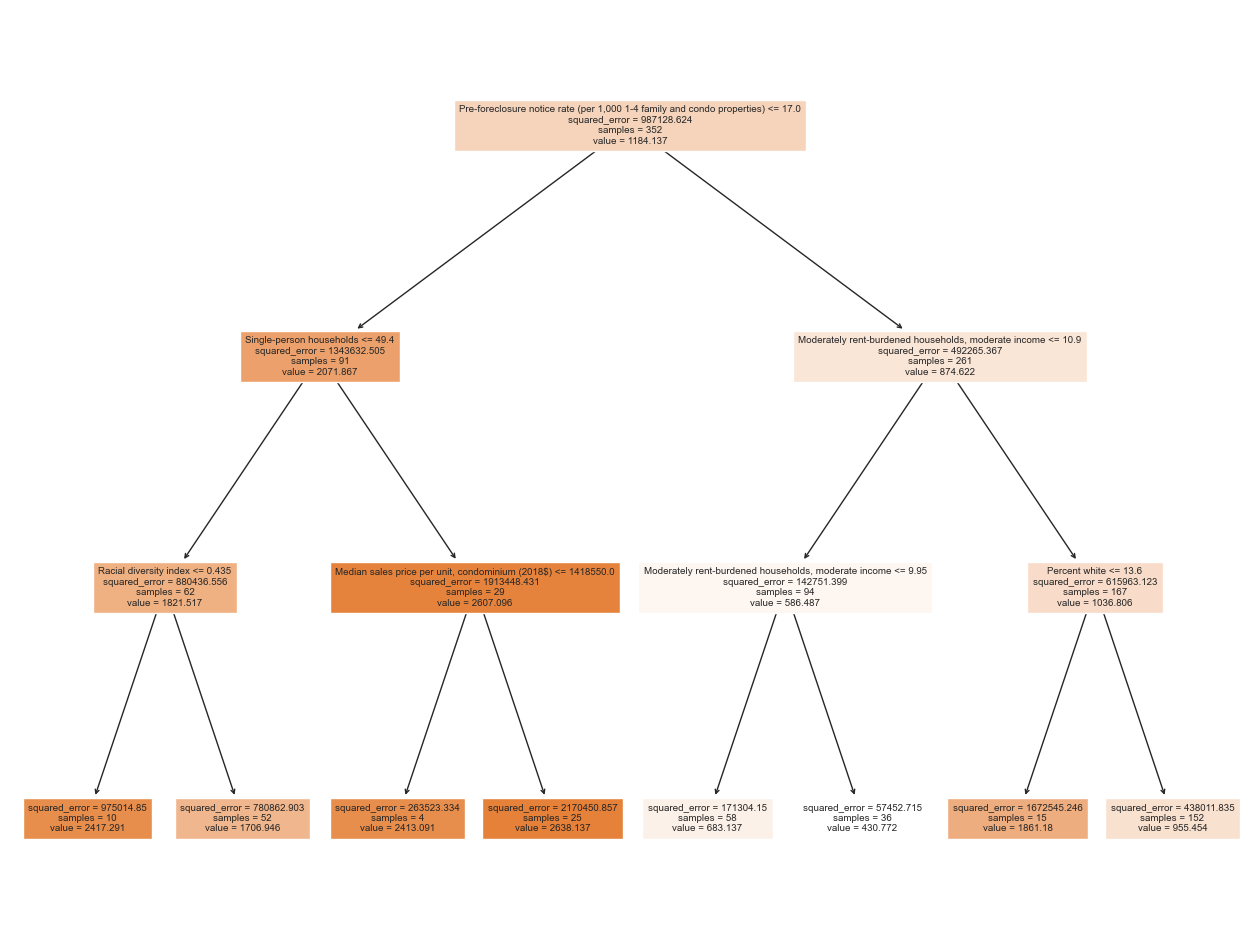

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(16,12)) 
plot_tree(model, feature_names=feature_names, filled=True, fontsize=7)
plt.show()

C:\Users\dota\AppData\Local\Temp\ipykernel_18020\1730738897.py:6: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  average_flow_mean = float(data[['Average_Flow']].mean())


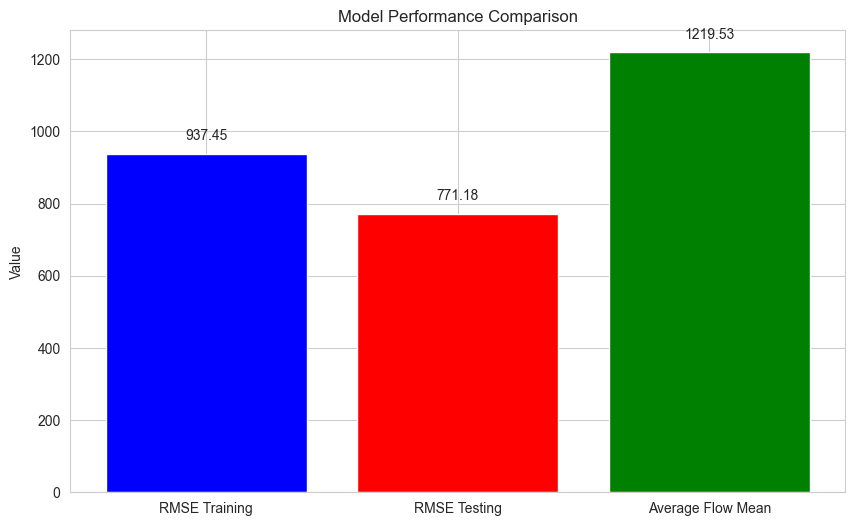

In [ ]:
import matplotlib.pyplot as plt

# Given data
rmse_training = rmse
rmse_testing = rmse2
average_flow_mean = float(data[['Average_Flow']].mean())
# Labels for the bars
labels = ['RMSE Training', 'RMSE Testing', 'Average Flow Mean']

# Values corresponding to the labels
values = [rmse_training, rmse_testing, average_flow_mean]

# Creating the bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(labels, values, color=['blue', 'red', 'green'])

# Adding the title and labels
plt.title('Model Performance Comparison')
plt.ylabel('Value')

# Adding the value labels on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 30, round(yval, 2), ha='center', va='bottom')

# Show the plot
plt.show()

### **3. Random Forest**

In [8]:
def normalize(data):
    scaler = StandardScaler()
    scaler.fit(data)
    return scaler.transform(data)
   
X_train, X_test, Y_train, Y_test = train_test_split(Xs_matrix_new, Ys_column, test_size=0.2, random_state=42)

## train data
X_train = normalize(X_train)
Y_train = normalize(Y_train)

## test data
X_test = normalize(X_test)
Y_test = normalize(Y_test)

In [9]:
def RF(tree = 100,d = 10):
    from sklearn.ensemble import RandomForestRegressor
    from sklearn.model_selection import GridSearchCV

    random_regression = RandomForestRegressor(n_estimators = tree, random_state = 0, max_features="log2", max_depth= d)
    random_regression.fit(X_train, Y_train)
    Y_pred = random_regression.predict(X_test)

    print('Mean Absolute Error:', mean_absolute_error(Y_test, Y_pred))
    print('Mean Squared Error:', mean_squared_error(Y_test, Y_pred))
    print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test, Y_pred)))
    print("R2 score is:", r2_score(Y_test, Y_pred))

    #plt.scatter(Y_test, Y_pred)
    #plt.plot(Y_test, Y_test, color='red')
    #plt.show()

    return r2_score(Y_test, Y_pred)

#### Parameters adjustment

e:\ANOCADA3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Mean Absolute Error: 0.6041804423140172
Mean Squared Error: 0.6603442255086938
Root Mean Squared Error: 0.8126156690026927
R2 score is: 0.33965577449130613


e:\ANOCADA3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Mean Absolute Error: 0.6101465656417487
Mean Squared Error: 0.6677116325123841
Root Mean Squared Error: 0.8171362386483566
R2 score is: 0.3322883674876158


e:\ANOCADA3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Mean Absolute Error: 0.6165459874410769
Mean Squared Error: 0.6758868606195807
Root Mean Squared Error: 0.8221233852771619
R2 score is: 0.3241131393804192


e:\ANOCADA3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Mean Absolute Error: 0.6188941080203498
Mean Squared Error: 0.6822744909477492
Root Mean Squared Error: 0.8259990865296094
R2 score is: 0.3177255090522507


e:\ANOCADA3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Mean Absolute Error: 0.6225511724331559
Mean Squared Error: 0.685918143533234
Root Mean Squared Error: 0.8282017529160597
R2 score is: 0.3140818564667659


e:\ANOCADA3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Mean Absolute Error: 0.6228078205472932
Mean Squared Error: 0.6852261186763705
Root Mean Squared Error: 0.8277838598791175
R2 score is: 0.3147738813236294


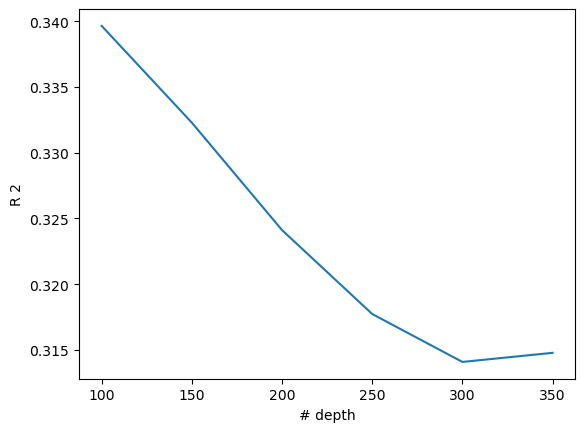

In [10]:
trees = [x for x in range(100,400,50)]
listr = []
for i in trees:
    listr.append(RF(tree = i))

plt.plot(trees, listr)
plt.xlabel("# depth")
plt.ylabel("R 2")
plt.savefig("F:/fig/RF_d.png")
plt.show()

e:\ANOCADA3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
e:\ANOCADA3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
e:\ANOCADA3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
e:\ANOCADA3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimato

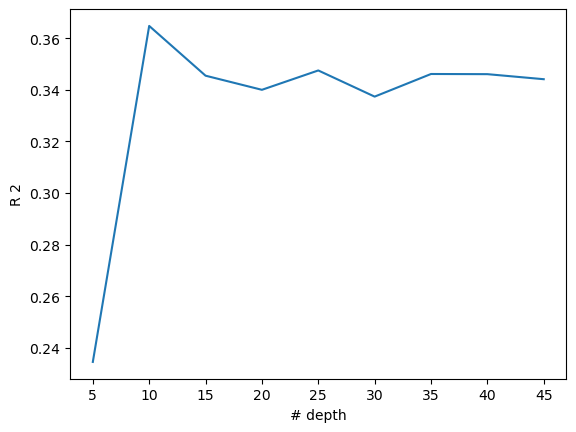

In [ ]:
depths = [x for x in range(5,50,5)]
listr = []
for i in depths:
    listr.append(RF(depth = i))

plt.plot(depths, listr)
plt.xlabel("# depth")
plt.ylabel("R 2")
plt.savefig("F:/fig/RF_d.png")
plt.show()

### **4. Nerual Network**

#### learning curves

In [ ]:
def learning_curve(activation = "tanh", solver = "adam", layers = (100)):
    model = MLPRegressor(activation = activation, solver=solver, alpha=1e-5,hidden_layer_sizes=layers, random_state=1)
    
    from sklearn.model_selection import learning_curve
    from sklearn.model_selection import ShuffleSplit
    cv = ShuffleSplit(n_splits=100, test_size=0.3, random_state=0)

    train_sizes, train_scores, test_scores = learning_curve(model, X, Y,cv = cv, n_jobs=2, train_sizes=np.linspace(.1, 1.0, 5))
    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1) 

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std,
                        alpha=0.1, color="b")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std,
                        alpha=0.1, color="r")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="b", label=u"train_score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="r", label=u"cross_validation_score")
    plt.title(activation)
    plt.savefig("F:/"+activation+".png")
    plt.show()

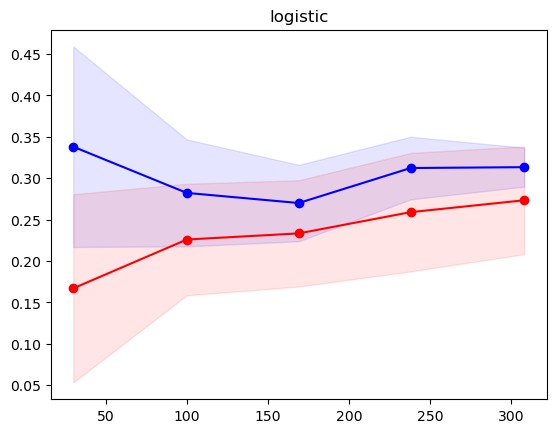

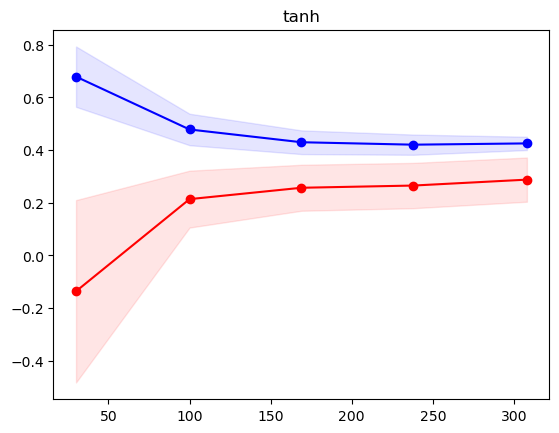

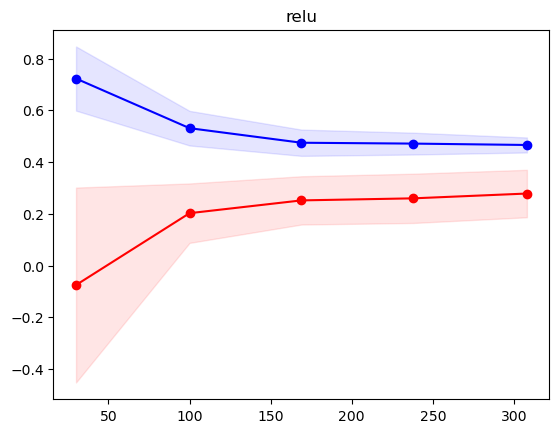

In [ ]:
for m in ['logistic', 'tanh', 'relu']:
    learning_curve(activation = m)

#### Model

In [ ]:
def NN(activation = "tanh", solver = "lbfgs", layers = (180,50)):
    from sklearn.neural_network import MLPRegressor

    clf = MLPRegressor(activation = activation, solver=solver, alpha=1e-5,hidden_layer_sizes=layers, random_state=1)

    clf.fit(X_train, Y_train)
    Y_pred=clf.predict(X_test)

    rmse = np.sqrt(np.sum((Y_pred - Y_test) ** 2) / len(X_test))
    mse = mean_squared_error(Y_test, Y_pred)
    mae = mean_absolute_error(Y_test, Y_pred)
    # notice
    R_squared_Error = 1 - mse / np.var(Y_test)
    print("RMSE is:", rmse)
    print("MSE is:", mse)
    print("MAE is:", mae)
    print("R2 score is:", r2_score(Y_test, Y_pred))

    #plt.scatter(Y_test, Y_pred, label = "predicted")
    #plt.plot(Y_test, Y_test, color='red', label = "actual")
    #plt.title("The predicted results and the actual results")
    #plt.xlabel("The actual results")

    #plt.savefig('F:/NN.png')
    #plt.show()
    return r2_score(Y_test, Y_pred)

#### parameters adjustment

e:\ANOCADA3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1625: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
e:\ANOCADA3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1625: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
e:\ANOCADA3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1625: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
e:\ANOCADA3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1625: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chan

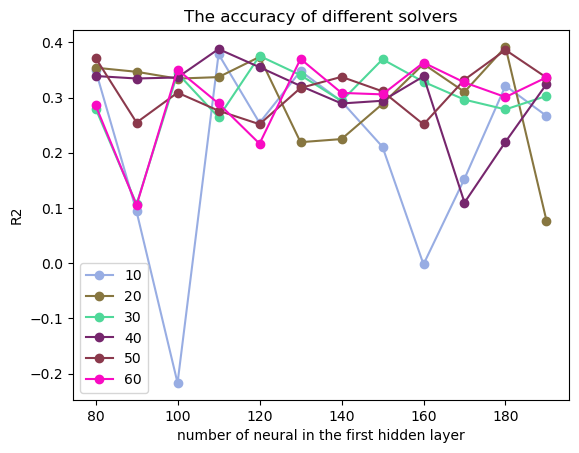

In [ ]:
layer_1 = list(range(80,200,10))
layer_2 = list(range(10,70,10))
name = ['lbfgs', 'sgd', 'adam']

results={j:[] for j in layer_2}

for j in layer_2:
    for i in layer_1:
        results[j].append(NN(layers=(i,j)))


for j in layer_2:
    col = (np.random.random(), np.random.random(), np.random.random())
    plt.plot(layer_1, results[j], 'o-', label = j,color = col)

plt.title('The accuracy of different solvers')
plt.legend()
plt.savefig("F:/fig/accuracy_dl.png")
plt.ylabel("R2")
plt.xlabel("number of neural in the first hidden layer")
plt.show()



e:\ANOCADA3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1625: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
e:\ANOCADA3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1625: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
e:\ANOCADA3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1625: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
e:\ANOCADA3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1625: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chan

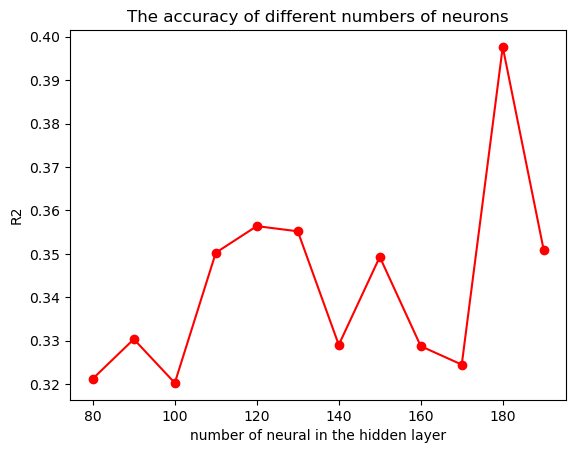

In [ ]:
r = []
for i in layer_1:
    r.append(NN(layers=(i)))

plt.plot(layer_1, r, 'o-',color = 'r')

plt.title('The accuracy of different numbers of neurons')
plt.savefig("F:/fig/accuracy_sl.png")
plt.ylabel("R2")
plt.xlabel("number of neural in the hidden layer")
plt.show()

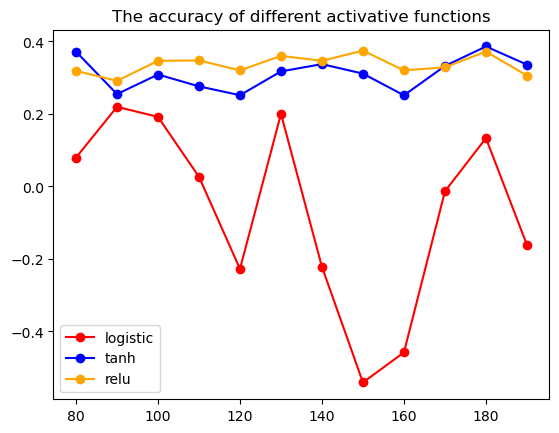

In [ ]:
results={j:[] for j in name}

for j in name:
    for i in layer_1:
        results[j].append(NN(activation=j, layers=(i)))

plt.plot(layer_1, results['logistic'], 'o-', label = 'logistic',color = 'r')
plt.plot(layer_1, results['tanh'], 'o-', label = 'tanh',color = 'b')
plt.plot(layer_1, results['relu'], 'o-', label = 'relu',color = 'orange')
plt.title('The accuracy of different activative functions')
plt.legend()
plt.savefig("F:/fig/accuracy.png")
plt.show()

e:\ANOCADA3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1625: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
e:\ANOCADA3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
e:\ANOCADA3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1625: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


RMSE is: 10.616150473058745
MSE is: 0.6743223062322449
MAE is: 0.6192313157813996
R2 score is: 0.325677693767755


e:\ANOCADA3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
e:\ANOCADA3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1625: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


RMSE is: 10.711691797267418
MSE is: 0.7002953145989796
MAE is: 0.6247873664578023
R2 score is: 0.29970468540102024


e:\ANOCADA3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
e:\ANOCADA3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1625: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


RMSE is: 10.646924461439067
MSE is: 0.6830394973971954
MAE is: 0.6215911957267214
R2 score is: 0.3169605026028045


e:\ANOCADA3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
e:\ANOCADA3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1625: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


RMSE is: 10.622244698444606
MSE is: 0.6579293164236243
MAE is: 0.6000193643320052
R2 score is: 0.3420706835763756


e:\ANOCADA3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
e:\ANOCADA3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1625: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


RMSE is: 10.722531816751673
MSE is: 0.6734487465199356
MAE is: 0.6110969932054904
R2 score is: 0.3265512534800643


e:\ANOCADA3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
e:\ANOCADA3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1625: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


RMSE is: 10.665948404481597
MSE is: 0.6769428449563675
MAE is: 0.6140486121761367
R2 score is: 0.3230571550436324


e:\ANOCADA3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
e:\ANOCADA3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1625: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


RMSE is: 10.782982713663424
MSE is: 0.6990150007114911
MAE is: 0.62765470190485
R2 score is: 0.30098499928850875


e:\ANOCADA3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
e:\ANOCADA3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1625: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


RMSE is: 10.572595429903876
MSE is: 0.6708549733547682
MAE is: 0.6116624003477606
R2 score is: 0.3291450266452317


e:\ANOCADA3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
e:\ANOCADA3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1625: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


RMSE is: 10.589785445559022
MSE is: 0.6652755629799036
MAE is: 0.6048812000396829
R2 score is: 0.33472443702009624


e:\ANOCADA3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
e:\ANOCADA3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1625: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


RMSE is: 10.702077839051807
MSE is: 0.6712469989582507
MAE is: 0.6125022742335928
R2 score is: 0.3287530010417492


e:\ANOCADA3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
e:\ANOCADA3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1625: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


RMSE is: 10.649105382293586
MSE is: 0.6635422224106322
MAE is: 0.6030988783437625
R2 score is: 0.3364577775893677


e:\ANOCADA3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
e:\ANOCADA3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1625: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
e:\ANOCADA3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1625: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


RMSE is: 10.633209770088403
MSE is: 0.6677062306113559
MAE is: 0.6093800659620373
R2 score is: 0.33229376938864397
RMSE is: 10.640276263830227
MSE is: 0.6951079171679073
MAE is: 0.6183211104694362
R2 score is: 0.30489208283209257
RMSE is: 10.627307866370248
MSE is: 0.7034108181408881
MAE is: 0.6276044425103154
R2 score is: 0.29658918185911176


e:\ANOCADA3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1625: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


RMSE is: 10.573600794140537
MSE is: 0.6958302677183699
MAE is: 0.6196591422382773
R2 score is: 0.30416973228163
RMSE is: 10.626153773249692
MSE is: 0.6805890522157303
MAE is: 0.6119832981000933
R2 score is: 0.3194109477842696


e:\ANOCADA3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1625: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
e:\ANOCADA3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1625: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


RMSE is: 10.593800224061397
MSE is: 0.6617573202876113
MAE is: 0.6017041524570501
R2 score is: 0.33824267971238864
RMSE is: 10.575729125403866
MSE is: 0.6935709930716049
MAE is: 0.6212152191574346
R2 score is: 0.30642900692839503


e:\ANOCADA3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1625: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
e:\ANOCADA3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1625: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


RMSE is: 10.684988091945746
MSE is: 0.6749161620666155
MAE is: 0.6108333307651929
R2 score is: 0.32508383793338436
RMSE is: 10.594836406549293
MSE is: 0.6709924273849885
MAE is: 0.6051891269231416
R2 score is: 0.32900757261501135


e:\ANOCADA3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1625: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
e:\ANOCADA3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1625: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


RMSE is: 10.625307433142412
MSE is: 0.6941230237669911
MAE is: 0.6243928460197824
R2 score is: 0.3058769762330088
RMSE is: 10.625856054285816
MSE is: 0.6785805336360291
MAE is: 0.6124107757829879
R2 score is: 0.3214194663639708


e:\ANOCADA3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1625: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
e:\ANOCADA3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1625: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


RMSE is: 10.58266813843701
MSE is: 0.6667200555081358
MAE is: 0.6043953696871017
R2 score is: 0.33327994449186404
RMSE is: 10.657034394310424
MSE is: 0.6811676006442025
MAE is: 0.6131027938816178
R2 score is: 0.31883239935579744


e:\ANOCADA3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1625: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
e:\ANOCADA3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1625: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


RMSE is: 11.174206278664494
MSE is: 0.6787621165261999
MAE is: 0.6272691866318124
R2 score is: 0.3212378834738
RMSE is: 11.177407189987283
MSE is: 0.6696571685262828
MAE is: 0.6006104002811535
R2 score is: 0.3303428314737171


e:\ANOCADA3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1625: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
e:\ANOCADA3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1625: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


RMSE is: 11.215535986838221
MSE is: 0.6797377097332729
MAE is: 0.6215174088870178
R2 score is: 0.32026229026672703
RMSE is: 11.092062690413766
MSE is: 0.6497463524016811
MAE is: 0.5991236467175741
R2 score is: 0.3502536475983188


e:\ANOCADA3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1625: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
e:\ANOCADA3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1625: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


RMSE is: 11.269705045834133
MSE is: 0.6436156448619008
MAE is: 0.6064286260764329
R2 score is: 0.3563843551380991
RMSE is: 11.255839729606253
MSE is: 0.64480972859267
MAE is: 0.5937780183334528
R2 score is: 0.35519027140732984


e:\ANOCADA3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1625: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
e:\ANOCADA3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1625: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


RMSE is: 11.291706938335844
MSE is: 0.6709730870182977
MAE is: 0.6093651455985797
R2 score is: 0.32902691298170217


e:\ANOCADA3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1625: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


RMSE is: 11.140485425890235
MSE is: 0.6507070469793163
MAE is: 0.6037911315262182
R2 score is: 0.34929295302068364


e:\ANOCADA3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1625: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


RMSE is: 11.153356340370562
MSE is: 0.6712659192151544
MAE is: 0.6205561473280032
R2 score is: 0.32873408078484545


e:\ANOCADA3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1625: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


RMSE is: 11.38024765156413
MSE is: 0.6755207564950814
MAE is: 0.6242407513300285
R2 score is: 0.3244792435049185


e:\ANOCADA3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1625: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


RMSE is: 11.383368513855169
MSE is: 0.6023374004424539
MAE is: 0.5839899785252475
R2 score is: 0.397662599557546


e:\ANOCADA3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1625: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


RMSE is: 11.358833850403668
MSE is: 0.649141076231452
MAE is: 0.6027356443553082
R2 score is: 0.3508589237685479


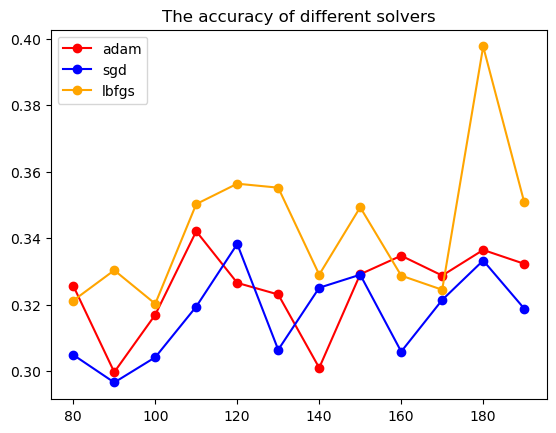

In [ ]:
solvers = ['adam', 'sgd', 'lbfgs']
results={j:[] for j in solvers}

for j in solvers:
    for i in layer_1:
        results[j].append(NN(solver = j, layers=(i)))
plt.plot(layer_1, results['adam'], 'o-', label = 'adam',color = 'r')
plt.plot(layer_1, results['sgd'], 'o-', label = 'sgd',color = 'b')
plt.plot(layer_1, results['lbfgs'], 'o-', label = 'lbfgs',color = 'orange')
plt.title('The accuracy of different solvers')
plt.legend()
plt.savefig("F:/fig/accuracy.png")
plt.show()

### **5. Time series Model**

In [ ]:
data = pd.read_csv("subway_neighbor_df.csv")
df = data
df['Datetime'] = pd.to_datetime(df['Datetime'])

<Figure size 1000x600 with 0 Axes>

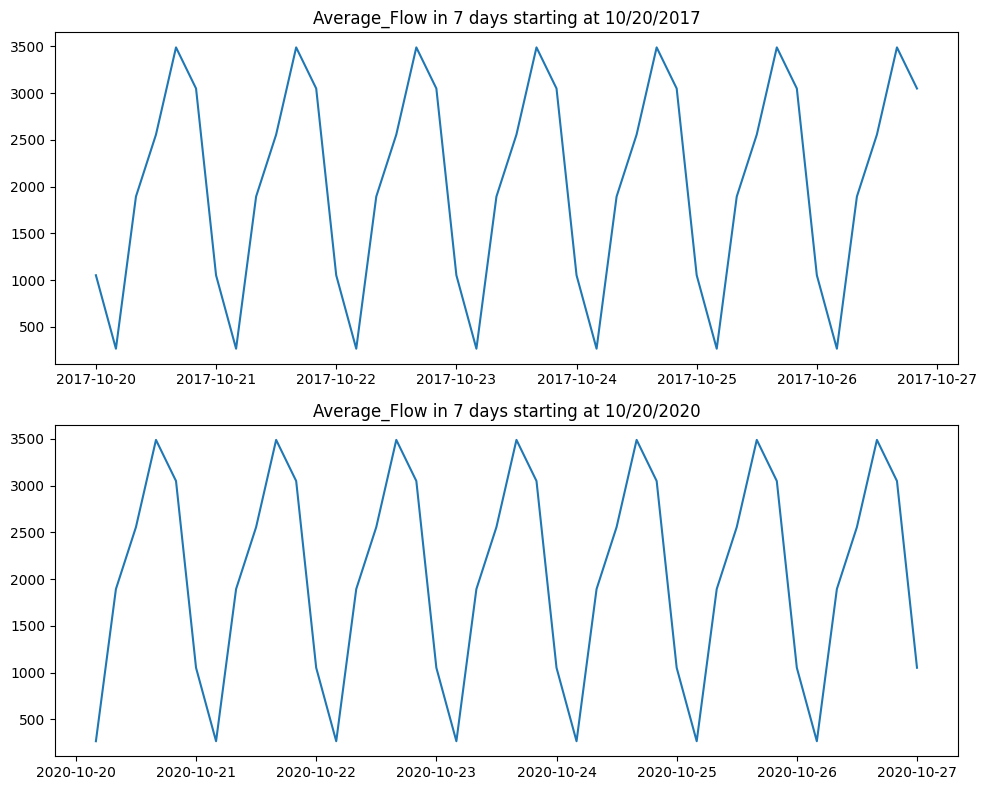

In [ ]:
df1 = df[(df['Stop Name'] == '1 Av') & (df['Line'] == 'Canarsie')] #One line, one stop
#print(df1['Average_Flow'])

df1_time_flow = df1[['Datetime', 'Average_Flow']].copy() #We keep only the Datetime and Normalized Flow columns
df1_time_flow.set_index('Datetime', inplace=True) # Using date as the index


k = len(df1['Average_Flow']) + 1

#import matplotlib.pyplot as plt

# Plotting
plt.figure(figsize=(10, 6))

# Create a 1x2 grid of subplots to show the traffic pattern in 2017 and 2021
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 8))

axes[0].plot(df1_time_flow.iloc[1542:1584], linestyle='-')
axes[1].plot(df1_time_flow.iloc[8000:8042], linestyle='-')

# Set titles for subplots
axes[0].set_title('Average_Flow in 7 days starting at 10/20/2017')
axes[1].set_title('Average_Flow in 7 days starting at 10/20/2020')

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()



### Average flow is identical every day, between 2017 and 2021, as proven in the samples below


In [ ]:
df1_time_flow['Average_Flow'].unique() #Only 6 values, time series in meaningless for Average Flow

array([1893.28275442, 2555.77322738, 3487.84573171, 3048.49420378,
       1051.80342927,  266.27238572])

Here, we look into the Normalized_Flow of Station 1.


<Figure size 1000x600 with 0 Axes>

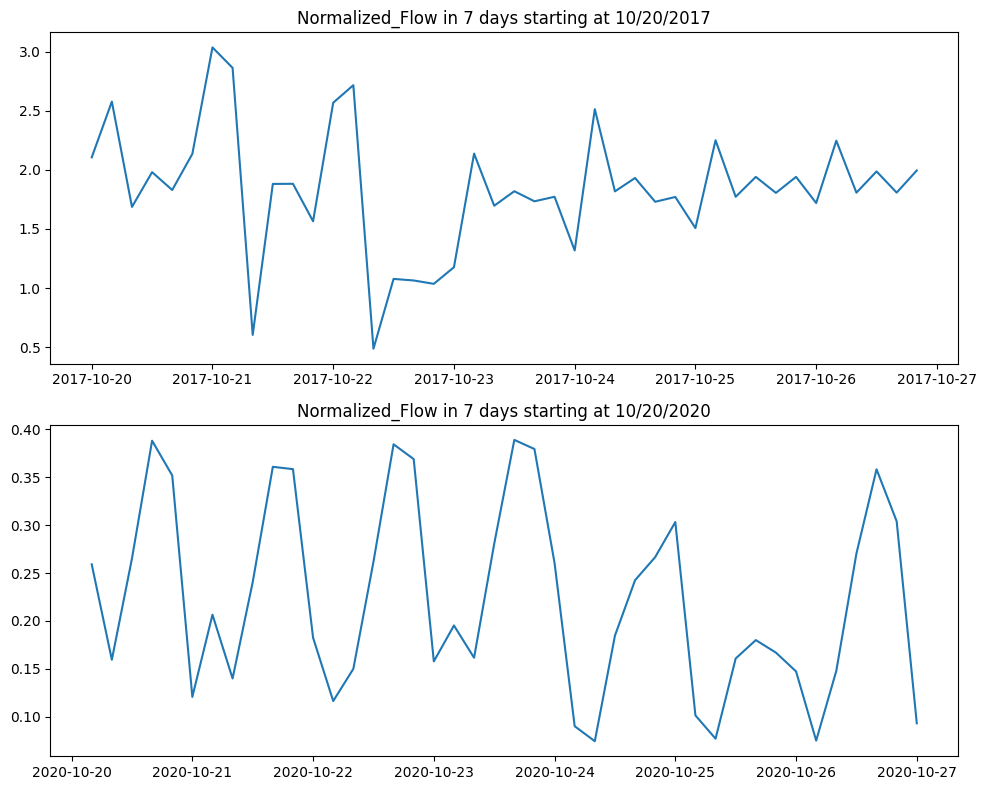

In [ ]:
df1 = df[(df['Stop Name'] == '1 Av') & (df['Line'] == 'Canarsie')] #One line, one stop

df1_time_flow = df1[['Datetime', 'Normalized_Flow']].copy() #We keep only the Datetime and Normalized Flow columns
df1_time_flow.set_index('Datetime', inplace=True) # Using date as the index
#df1_time_flow.head()

k = len(df1_time_flow) + 1

import matplotlib.pyplot as plt

# Plotting
plt.figure(figsize=(10, 6))

# Create a 1x2 grid of subplots to show the traffic pattern in 2017 and 2021
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 8))

axes[0].plot(df1_time_flow.iloc[1542:1584], linestyle='-')
axes[1].plot(df1_time_flow.iloc[8000:8042], linestyle='-')

# Set titles for subplots
axes[0].set_title('Normalized_Flow in 7 days starting at 10/20/2017')
axes[1].set_title('Normalized_Flow in 7 days starting at 10/20/2020')

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

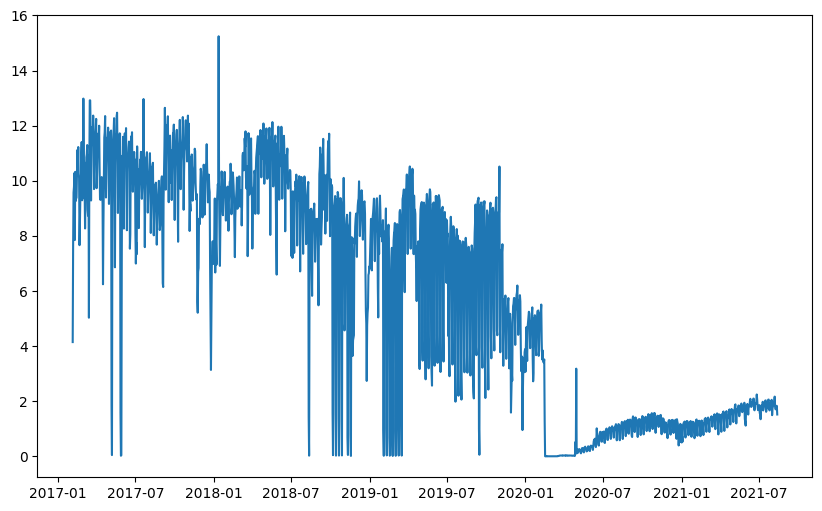

In [ ]:
# The above figure shows a strong seasonality on daily basis, which is easy to understand.
# Also note the ridership in 2020 is much reduced due to Covid restrictions

# In this cell we look at the aggregated daily ridership which is of more interest.


# Aggregating data aross a day

d1_time_flow_daily = df1_time_flow['Normalized_Flow'].resample('D').sum()

# plot the daily data cross the whole window

plt.figure(figsize=(10, 6))

plt.plot(d1_time_flow_daily, linestyle='-')
# Show the plot
plt.show()

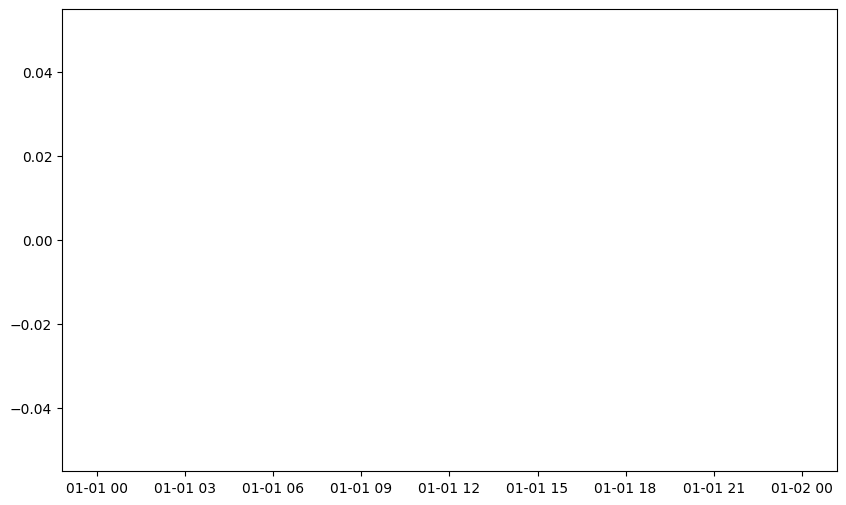

In [ ]:
# The above figure shows a clear disruption caused by Covid.
# we now look into another station, Station 2


df[df['Line']=='Jamaica']['Stop Name'].unique()
df2 = df[(df['Stop Name'] == 'Broad St') & (df['Line'] == 'Jamaica')]

df2_time_flow = df2[['Datetime', 'Normalized_Flow']].copy()
df2_time_flow.set_index('Datetime', inplace=True)

# Aggregating data cross a day

d2_time_flow_daily = df2_time_flow['Normalized_Flow'].resample('D').sum()

# plot the daily data cross the whole window

plt.figure(figsize=(10, 6))

plt.plot(d2_time_flow_daily, linestyle='-')
# Show the plot
plt.show()

# The figure below also shows the significant distribution caused by Covid

Given the covid disrution, we intend to break the ridership data before and after covid
We do this respectively for df1 and df2, so that we will have 4 time series data.

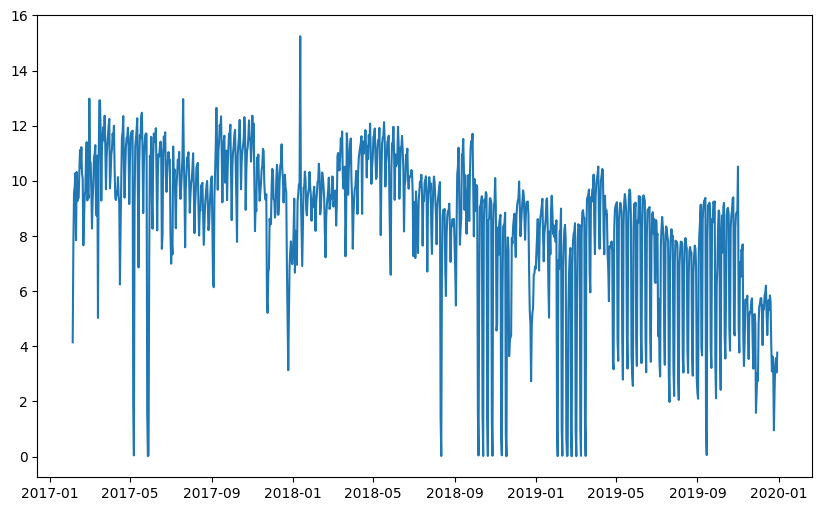

Datetime
2019-12-26    2.402847
2019-12-27    3.346843
2019-12-28    3.573909
2019-12-29    3.050358
2019-12-30    3.771027
Freq: D, Name: Normalized_Flow, dtype: float64

In [ ]:
# d1 pre-covid
d1_pre_ridership = d1_time_flow_daily.iloc[0:1060]

plt.figure(figsize=(10, 6))

plt.plot(d1_pre_ridership, linestyle='-')
# Show the plot
plt.show()
d1_pre_ridership.tail()

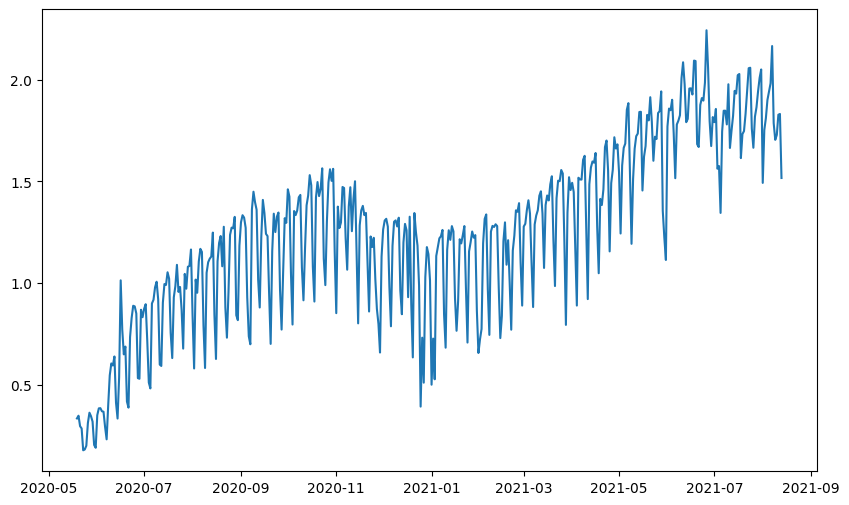

Datetime
2020-05-19    0.334001
2020-05-20    0.347479
2020-05-21    0.296126
2020-05-22    0.284676
2020-05-23    0.177548
Freq: D, Name: Normalized_Flow, dtype: float64

In [ ]:
# d1 post-covid
d1_post_ridership = d1_time_flow_daily.iloc[1200:]

plt.figure(figsize=(10, 6))

plt.plot(d1_post_ridership, linestyle='-')
# Show the plot
plt.show()
d1_post_ridership.head()

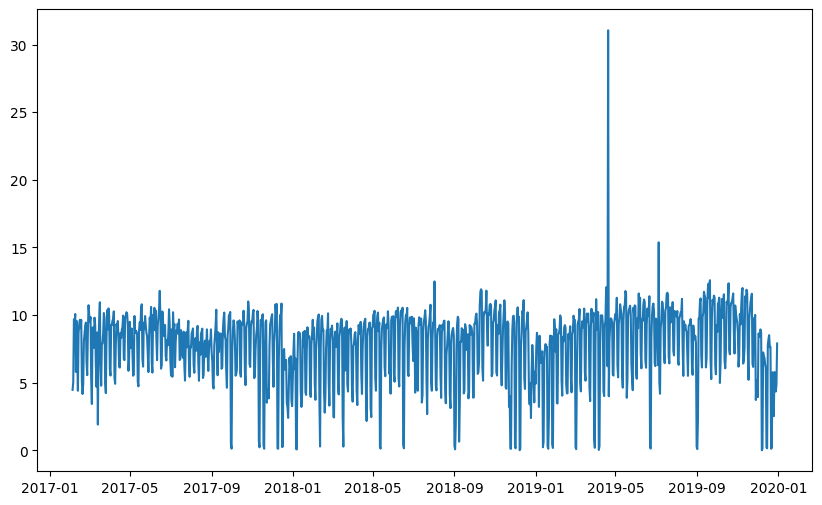

Datetime
2019-12-26    5.790805
2019-12-27    5.701173
2019-12-28    4.344079
2019-12-29    4.861621
2019-12-30    7.900214
Freq: D, Name: Normalized_Flow, dtype: float64

In [ ]:
# d2 pre-covid
d2_pre_ridership = d2_time_flow_daily.iloc[0:1060]


plt.figure(figsize=(10, 6))

plt.plot(d2_pre_ridership, linestyle='-')
# Show the plot
plt.show()
d2_pre_ridership.tail()

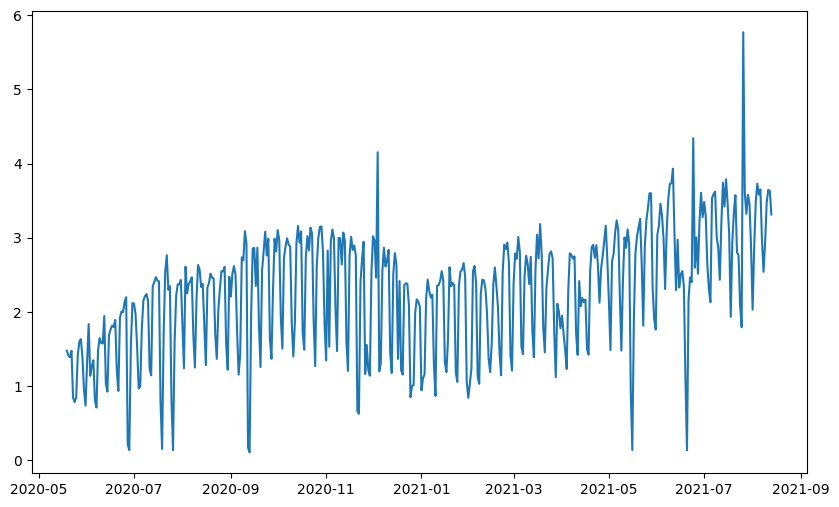

Datetime
2020-05-19    1.476638
2020-05-20    1.411375
2020-05-21    1.387459
2020-05-22    1.474266
2020-05-23    0.844669
Freq: D, Name: Normalized_Flow, dtype: float64

In [ ]:
# d2 post-covid
d2_post_ridership = d2_time_flow_daily.iloc[1200:]

plt.figure(figsize=(10, 6))

plt.plot(d2_post_ridership, linestyle='-')
# Show the plot
plt.show()
d2_post_ridership.head()

In [ ]:
#from pmdarima import auto_arima
#import pandas as pd

# Assuming you have a time series in a DataFrame with a column 'value'
# Replace 'your_data.csv' with the path to your data file

# Assuming your time series is univariate (only one column)
y = d1_pre_ridership

# Use auto_arima to find the best ARIMA parameters
model = auto_arima(y, seasonal=True, m=7)  # Adjust 'm' based on your seasonality

# Print the summary of the best model
print(model.summary())

                                     SARIMAX Results                                     
Dep. Variable:                                 y   No. Observations:                 1060
Model:             SARIMAX(5, 1, 1)x(2, 0, 1, 7)   Log Likelihood               -1746.668
Date:                           Sun, 03 Dec 2023   AIC                           3515.336
Time:                                   04:06:50   BIC                           3569.952
Sample:                               02-04-2017   HQIC                          3536.036
                                    - 12-30-2019                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept  -3.308e-05      0.000     -0.265      0.791      -0.000       0.000
ar.L1          0.6951      0.025     28.295

d1 Post Ridership (post Covid)

In [ ]:
# SARIMA (Seasonal ARIMA) for d1_post_ridership (post Covid)

# d1 post-covid
d1_post_ridership = d1_time_flow_daily.iloc[1200:1200+400]


plt.figure(figsize=(10, 6))

plt.plot(d1_post_ridership, linestyle='-')
# Show the plot
plt.show()
d1_post_ridership.head()



#pip install pmdarima

from pmdarima import auto_arima
import pandas as pd
import matplotlib.pyplot as plt  # Import matplotlib for plotting


y = d1_post_ridership
print('the lenth of the time-series data is', len(y))


pd_steps = 28  # predicting 28 days ahead

y_train = y[:len(y) - pd_steps]
y_test = y[len(y) - pd_steps:]

# Decompose y_train
ts_decomp = sm.tsa.seasonal_decompose(y_train, model = 'additive')
plt.figure(figsize=(16, 12))
ts_decomp.plot()
plt.show()


# Use auto_arima to find the best ARIMA parameters with seasonalty set to 7 from the above decomposition

model = auto_arima(y_train, seasonal=True, m=7)  # Adjust 'm' based on your seasonality

# Print the summary of the best model
print(model.summary())

# Forecast
forecast, conf_int = model.predict(n_periods=pd_steps, return_conf_int=True)
predictions = pd.Series(forecast, index=y_test.index)

fig, ax = plt.subplots(figsize=(14, 7))
y.plot(label='Actual', ax=ax)
predictions.plot(ax=ax, label='Prediction')
plt.xlabel('Date')
plt.ylabel('Normalized_Flow')
plt.legend()
plt.show()

In [ ]:
#Model diagnostivs for d1-post

model.plot_diagnostics(figsize=(16, 8))
plt.show()

d1_pre_ridership (pre Covid)

In [ ]:
# SARIMA for d1_pre_ridership (pre Covid)

# d1 post-covid
d1_pre_ridership = d1_time_flow_daily.iloc[100:100+400]


plt.figure(figsize=(10, 6))

plt.plot(d1_pre_ridership, linestyle='-')
# Show the plot
plt.show()
d1_pre_ridership.head()



#pip install pmdarima

from pmdarima import auto_arima
import pandas as pd
import matplotlib.pyplot as plt  # Import matplotlib for plotting


y = d1_pre_ridership
print('the lenth of the time-series data is', len(y))


pd_steps = 28  # predicting 28 days ahead

y_train = y[:len(y) - pd_steps]
y_test = y[len(y) - pd_steps:]

# Decompose y_train
ts_decomp = sm.tsa.seasonal_decompose(y_train, model = 'additive')
plt.figure(figsize=(16, 12))
ts_decomp.plot()
plt.show()


# Use auto_arima to find the best ARIMA parameters with seasonalty set to 7 from the above decomposition

model = auto_arima(y_train, seasonal=True, m=7)  # Adjust 'm' based on your seasonality

# Print the summary of the best model
print(model.summary())

# Forecast
forecast, conf_int = model.predict(n_periods=pd_steps, return_conf_int=True)
predictions = pd.Series(forecast, index=y_test.index)

fig, ax = plt.subplots(figsize=(14, 7))
y.plot(label='Actual', ax=ax)
predictions.plot(ax=ax, label='Prediction')
plt.xlabel('Date')
plt.ylabel('Normalized_Flow')
plt.legend()
plt.show()

In [ ]:
#Model diagnostivs for d1-pre

model.plot_diagnostics(figsize=(16, 8))
plt.show() #Conclusion: FOr any given station, the pre and post COVID ARIMA models are different. Also want to show that in the sanme period, the ARIMA model under different stations are different

In [ ]:
# SARIMA (Seasonal ARIMA) for d2_post_ridership (post Covid)

# d2 post-covid
d2_post_ridership = d2_time_flow_daily.iloc[1200:1200+400]


plt.figure(figsize=(10, 6))

plt.plot(d2_post_ridership, linestyle='-')
# Show the plot
plt.show()
d2_post_ridership.head()



#pip install pmdarima

from pmdarima import auto_arima
import pandas as pd
import matplotlib.pyplot as plt  # Import matplotlib for plotting


y = d2_post_ridership
print('the lenth of the time-series data is', len(y))


pd_steps = 28  # predicting 28 days ahead

y_train = y[:len(y) - pd_steps]
y_test = y[len(y) - pd_steps:]

# Decompose y_train
ts_decomp = sm.tsa.seasonal_decompose(y_train, model = 'additive')
plt.figure(figsize=(16, 12))
ts_decomp.plot()
plt.show()


# Use auto_arima to find the best ARIMA parameters with seasonalty set to 7 from the above decomposition

model = auto_arima(y_train, seasonal=True, m=7)  # Adjust 'm' based on your seasonality

# Print the summary of the best model
print(model.summary())

# Forecast
forecast, conf_int = model.predict(n_periods=pd_steps, return_conf_int=True)
predictions = pd.Series(forecast, index=y_test.index)

fig, ax = plt.subplots(figsize=(14, 7))
y.plot(label='Actual', ax=ax)
predictions.plot(ax=ax, label='Prediction')
plt.xlabel('Date')
plt.ylabel('Normalized_Flow')
plt.legend()
plt.show()

In [ ]:
#Model diagnostivs for d2-post

model.plot_diagnostics(figsize=(16, 8))
plt.show()

In [ ]:
# SARIMA for d2_pre_ridership (pre Covid)

# d1 post-covid
d2_pre_ridership = d2_time_flow_daily.iloc[100:100+400]


plt.figure(figsize=(10, 6))

plt.plot(d1_pre_ridership, linestyle='-')
# Show the plot
plt.show()
d2_pre_ridership.head()



#pip install pmdarima

from pmdarima import auto_arima
import pandas as pd
import matplotlib.pyplot as plt  # Import matplotlib for plotting


y = d2_pre_ridership
print('the lenth of the time-series data is', len(y))


pd_steps = 28  # predicting 28 days ahead

y_train = y[:len(y) - pd_steps]
y_test = y[len(y) - pd_steps:]

# Decompose y_train
ts_decomp = sm.tsa.seasonal_decompose(y_train, model = 'additive')
plt.figure(figsize=(16, 12))
ts_decomp.plot()
plt.show()


# Use auto_arima to find the best ARIMA parameters with seasonalty set to 7 from the above decomposition

model = auto_arima(y_train, seasonal=True, m=7)  # Adjust 'm' based on your seasonality

# Print the summary of the best model
print(model.summary())

# Forecast
forecast, conf_int = model.predict(n_periods=pd_steps, return_conf_int=True)
predictions = pd.Series(forecast, index=y_test.index)

fig, ax = plt.subplots(figsize=(14, 7))
y.plot(label='Actual', ax=ax)
predictions.plot(ax=ax, label='Prediction')
plt.xlabel('Date')
plt.ylabel('Normalized_Flow')
plt.legend()
plt.show()

In [ ]:
#Model diagnostivs for d2-pre

model.plot_diagnostics(figsize=(16, 8))
plt.show()